In [96]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from pathlib import Path
import requests

%matplotlib inline

In [97]:
csvpath = Path("CAT_10year.csv")

In [98]:
cat_df = pd.read_csv(csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [99]:
cat_df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-28,$216.27,3171958,$216.45,$216.78,$213.56
2021-06-25,$216.31,11274170,$221.18,$221.75,$215.27
2021-06-24,$219.34,6827569,$216.54,$221.93,$215.33
2021-06-23,$213.79,3283361,$213.60,$216.77,$212.58
2021-06-22,$213.13,3776376,$213.49,$214.83,$211.18


In [100]:
cat_df.sort_index(ascending=True, inplace=True)

In [101]:
cat_df = cat_df.rename(columns={"Close/Last": "Close"})

In [102]:
cat_df = cat_df[['Close']]
cat_df

,Close
Date,
2011-06-29,$103.36
2011-06-30,$106.46
2011-07-01,$108.62
2011-07-05,$108.43
2011-07-06,$110.08
...,...
2021-06-22,$213.13
2021-06-23,$213.79
2021-06-24,$219.34


In [103]:
cat_df['Close'] = cat_df['Close'].str.replace('$', '').astype(float)

<ipython-input-103-98ee503b25f7>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  cat_df['Close'] = cat_df['Close'].str.replace('$', '').astype(float)


In [104]:
cat_df

,Close
Date,
2011-06-29,103.36
2011-06-30,106.46
2011-07-01,108.62
2011-07-05,108.43
2011-07-06,110.08
...,...
2021-06-22,213.13
2021-06-23,213.79
2021-06-24,219.34


In [110]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window- 1):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [114]:
window_size = 100
feature_column = 0 # why 0?
target_column = 0 # Why 0?

X, y = window_data(cat_df, window_size, feature_column, target_column)

print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[103.36 106.46 108.62 108.43 110.08 111.63 110.41 108.16 106.93 108.64
  107.58 109.36 107.8  109.64 110.31 111.6  105.15 105.66 105.2  101.34
   99.64  98.79 100.72  97.18  96.28  89.55  90.99  82.6   87.48  83.51
   87.25  89.81  91.37  89.35  87.64  83.33  79.97  79.89  82.98  85.4
   83.25  85.16  88.15  89.83  91.    88.55  85.38  85.7   88.69  87.04
   83.96  83.87  85.02  85.45  86.6   85.9   84.6   83.66  79.36  73.9
   73.86  76.85  77.67  75.08  75.39  73.84  70.55  72.54  74.26  77.09
   75.52  79.13  80.66  81.7   81.44  84.09  81.52  84.72  83.56  84.26
   87.39  91.77  89.89  91.57  96.33  96.85  94.46  91.63  93.94  96.
   95.74  95.    95.89  91.64  92.2   96.13  96.53  97.07  95.75  93.81]
 [106.46 108.62 108.43 110.08 111.63 110.41 108.16 106.93 108.64 107.58
  109.36 107.8  109.64 110.31 111.6  105.15 105.66 105.2  101.34  99.64
   98.79 100.72  97.18  96.28  89.55  90.99  82.6   87.48  83.51  87.25
   89.81  91.37  89.35  87.64  83.33  79.97  79.89

In [115]:
split = int(0.6 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [116]:
y_train

array([[ 93.93],
       [ 91.12],
       [ 89.99],
       ...,
       [113.6 ],
       [115.82],
       [114.75]])

In [82]:


# Create a MinMaxScaler object
#scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
#scaler.fit(X_train.reshape(1,-1))

# Scale the features training and testing sets
#X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
#scaler.fit(y_train)
#
# Scale the target training and testing sets
#y_train = scaler.transform(y_train)
#y_test = scaler.transform(y_test)

In [117]:
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

# Fit the scaler for the training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Fit the scaler for the testing Data
x_test_scaler.fit(X_test)
y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_test_scaler.transform(X_test)
y_test = y_test_scaler.transform(y_test)

In [118]:
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
#print (f"X_train sample values:\n{X_train[:3]} \n")
#print (f"X_test sample values:\n{X_test[:3]}")

In [119]:
# Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [120]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = window_size
# 20% of neurons to be dropped out
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [121]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100, 100)          40800     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 100)          80400     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_11 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [122]:
model.fit(X_train, y_train, epochs=20, shuffle=False, batch_size=100, verbose=1)

Epoch 1/20
15/15 [==============================] - 2s 78ms/step - loss: 0.2020
Epoch 2/20
15/15 [==============================] - 1s 74ms/step - loss: 0.0352
Epoch 3/20
15/15 [==============================] - 1s 82ms/step - loss: 0.0321
Epoch 4/20
15/15 [==============================] - 2s 146ms/step - loss: 0.0131
Epoch 5/20
15/15 [==============================] - 1s 92ms/step - loss: 0.0088
Epoch 6/20
15/15 [==============================] - 1s 75ms/step - loss: 0.0086
Epoch 7/20
15/15 [==============================] - 1s 70ms/step - loss: 0.0112
Epoch 8/20
15/15 [==============================] - 1s 70ms/step - loss: 0.0132
Epoch 9/20
15/15 [==============================] - 1s 69ms/step - loss: 0.0150
Epoch 10/20
15/15 [==============================] - 1s 70ms/step - loss: 0.0118
Epoch 11/20
15/15 [==============================] - 1s 93ms/step - loss: 0.0080
Epoch 12/20
15/15 [==============================] - 1s 99ms/step - loss: 0.0079
Epoch 13/20
15/15 [=================

In [123]:
model.evaluate(X_test, y_test, verbose=0)

0.002721773460507393

In [124]:
predicted = model.predict(X_test)

In [134]:
predicted_prices = y_test_scaler.inverse_transform(predicted)

In [135]:
real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1,1))

In [136]:
cat_actual_predicted = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = cat_df.index[-len(real_prices): ]) 

# Show the DataFrame's head
cat_actual_predicted.head()

,Actual,Predicted
Date,,
2017-08-25,114.78,113.723900
2017-08-28,115.35,113.804131
2017-08-29,115.07,113.911423
2017-08-30,116.01,114.033318
2017-08-31,117.55,114.179474


In [137]:
cat_actual_predicted.tail()

,Actual,Predicted
Date,,
2021-06-22,213.21,217.101257
2021-06-23,213.13,214.606262
2021-06-24,213.79,212.307373
2021-06-25,219.34,210.304565
2021-06-28,216.31,208.770584


<AxesSubplot:xlabel='Date'>

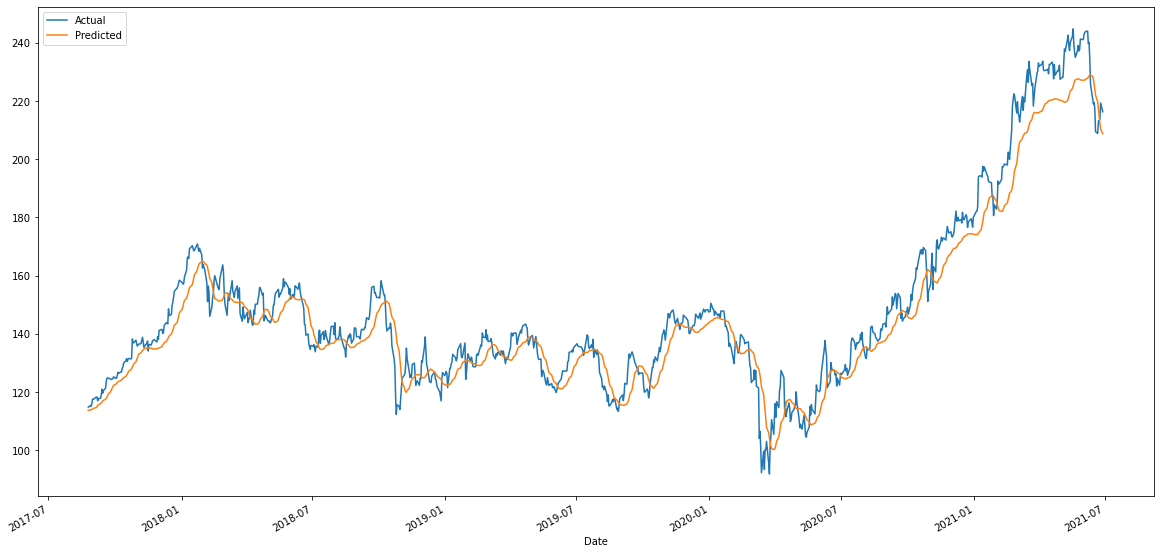

In [138]:
cat_actual_predicted.plot(figsize=(20,10))

In [140]:
# ARIMA - TS